In [1]:
!pip install numpy pandas sklearn openpyxl

In [2]:
import pandas as pd

# data location:
path = '../data/'
path = './'
file_name = 'Online Retail.xlsx'
sheet_name = 'Online Retail'
# read excel file
df = pd.read_excel(path + file_name, sheet_name=sheet_name)

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,`,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Drop unnecessary features
df.drop(columns=['Description', 'UnitPrice', 'Country'], inplace=True)

df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID
0,536365,85123A,6,`,17850.0
1,536365,71053,6,2010-12-01 08:26:00,17850.0
2,536365,84406B,8,2010-12-01 08:26:00,17850.0
3,536365,84029G,6,2010-12-01 08:26:00,17850.0
4,536365,84029E,6,2010-12-01 08:26:00,17850.0
...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,12680.0
541905,581587,22899,6,2011-12-09 12:50:00,12680.0
541906,581587,23254,4,2011-12-09 12:50:00,12680.0
541907,581587,23255,4,2011-12-09 12:50:00,12680.0


In [4]:
for value in ['POST', 'D', 'DOT', 'M' 'BANK CHARGES',\
                    'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL',\
                    'PADS', 'B', 'CRUK']:
    mask = (df['StockCode']==value)
    df.drop(index=mask[mask].keys(),inplace=True)

df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID
0,536365,85123A,6,`,17850.0
1,536365,71053,6,2010-12-01 08:26:00,17850.0
2,536365,84406B,8,2010-12-01 08:26:00,17850.0
3,536365,84029G,6,2010-12-01 08:26:00,17850.0
4,536365,84029E,6,2010-12-01 08:26:00,17850.0
...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,12680.0
541905,581587,22899,6,2011-12-09 12:50:00,12680.0
541906,581587,23254,4,2011-12-09 12:50:00,12680.0
541907,581587,23255,4,2011-12-09 12:50:00,12680.0


In [5]:
# Split time and day
from datetime import datetime

# First clean the dates
def invalid_date(date):
    try:
        if isinstance(date, datetime):
            return date
        datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        return date
    except Exception as e:
        print(e)
        return '??'

df['InvoiceDate'] = df.apply(lambda x: invalid_date(x['InvoiceDate']), axis=1)

df.loc[df['InvoiceDate']=='??', 'InvoiceDate'] = df.InvoiceDate.shift(-1)

def extract_date_data(date: str):
    if isinstance(date, datetime):
        date = date.strftime("%Y-%m-%d %H:%M:%S")
    date_time = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    day_start = datetime.strptime(date.split()[0] + " 00:00:00", "%Y-%m-%d %H:%M:%S")
    year_start = datetime.strptime(date.split()[0].split('-')[0] + "-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")

    time_of_day = int((date_time - day_start).total_seconds()//60)
    day_of_year = (date_time - year_start).days

    return day_of_year, time_of_day



date_data = df['InvoiceDate'].apply(extract_date_data)

date_data_df = pd.DataFrame(date_data, columns=["Day", "Time"])

df[['Day', 'Time']] = pd.DataFrame(date_data.to_frame()['InvoiceDate'].to_list())

df

time data '`' does not match format '%Y-%m-%d %H:%M:%S'


,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,334.0,506.0
1,536365,71053,6,2010-12-01 08:26:00,17850.0,334.0,506.0
2,536365,84406B,8,2010-12-01 08:26:00,17850.0,334.0,506.0
3,536365,84029G,6,2010-12-01 08:26:00,17850.0,334.0,506.0
4,536365,84029E,6,2010-12-01 08:26:00,17850.0,334.0,506.0
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,12680.0,NaN,NaN
541905,581587,22899,6,2011-12-09 12:50:00,12680.0,NaN,NaN
541906,581587,23254,4,2011-12-09 12:50:00,12680.0,NaN,NaN
541907,581587,23255,4,2011-12-09 12:50:00,12680.0,NaN,NaN


In [6]:
newdf = df

In [7]:
newdf.head(2)

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,334.0,506.0
1,536365,71053,6,2010-12-01 08:26:00,17850.0,334.0,506.0


In [12]:
# code for finding the quantity of repeating orders, try to subtract one from each row to find the repeating order

count_series = newdf.groupby(['CustomerID', 'StockCode']).size()
newdf_1 = count_series.to_frame(name = 'size').reset_index()

In [13]:
newdf_1.sort_values(['size'], ascending=[False]).head()

,CustomerID,StockCode,size
119501,14911.0,C2,85
250750,17841.0,79321,65
118354,14911.0,22423,56
249945,17841.0,21927,54
249960,17841.0,21975,54


In [14]:
newdf_1['size'] -= 1

newdf_1.sort_values(['size'], ascending=[False]).head()

,CustomerID,StockCode,size
119501,14911.0,C2,84
250750,17841.0,79321,64
118354,14911.0,22423,55
249945,17841.0,21927,53
249960,17841.0,21975,53


In [10]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,334.0,506.0
1,536365,71053,6,2010-12-01 08:26:00,17850.0,334.0,506.0
2,536365,84406B,8,2010-12-01 08:26:00,17850.0,334.0,506.0
3,536365,84029G,6,2010-12-01 08:26:00,17850.0,334.0,506.0
4,536365,84029E,6,2010-12-01 08:26:00,17850.0,334.0,506.0
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,12680.0,NaN,NaN
541905,581587,22899,6,2011-12-09 12:50:00,12680.0,NaN,NaN
541906,581587,23254,4,2011-12-09 12:50:00,12680.0,NaN,NaN
541907,581587,23255,4,2011-12-09 12:50:00,12680.0,NaN,NaN


In [18]:
df = pd.merge(df, newdf_1)
df.rename(columns={'size': "Reorders"}, inplace=True)
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time,Reorders
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,334.0,506.0,16
1,536373,85123A,6,2010-12-01 09:02:00,17850.0,334.0,542.0,16
2,536375,85123A,6,2010-12-01 09:32:00,17850.0,334.0,572.0,16
3,536396,85123A,6,2010-12-01 10:51:00,17850.0,334.0,651.0,16
4,536406,85123A,8,2010-12-01 11:33:00,17850.0,334.0,693.0,16
...,...,...,...,...,...,...,...,...
405515,581585,23145,12,2011-12-09 12:31:00,15804.0,NaN,NaN,0
405516,581587,22631,12,2011-12-09 12:50:00,12680.0,NaN,NaN,0
405517,581587,22613,12,2011-12-09 12:50:00,12680.0,NaN,NaN,0
405518,581587,23255,4,2011-12-09 12:50:00,12680.0,NaN,NaN,0


In [23]:
df['Target'] = pd.to_numeric(df['Reorders'] > 0).astype(int)

df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time,Reorders,Target
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,334.0,506.0,16,1
1,536373,85123A,6,2010-12-01 09:02:00,17850.0,334.0,542.0,16,1
2,536375,85123A,6,2010-12-01 09:32:00,17850.0,334.0,572.0,16,1
3,536396,85123A,6,2010-12-01 10:51:00,17850.0,334.0,651.0,16,1
4,536406,85123A,8,2010-12-01 11:33:00,17850.0,334.0,693.0,16,1
...,...,...,...,...,...,...,...,...,...
405515,581585,23145,12,2011-12-09 12:31:00,15804.0,NaN,NaN,0,0
405516,581587,22631,12,2011-12-09 12:50:00,12680.0,NaN,NaN,0,0
405517,581587,22613,12,2011-12-09 12:50:00,12680.0,NaN,NaN,0,0
405518,581587,23255,4,2011-12-09 12:50:00,12680.0,NaN,NaN,0,0


In [25]:
df.dropna(inplace=True)

In [29]:
df.drop(columns=['InvoiceDate'], inplace=True)

In [27]:
df['StockCode'] = df['StockCode'].astype('category')

df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time,Reorders,Target
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,334.0,506.0,16,1
1,536373,85123A,6,2010-12-01 09:02:00,17850.0,334.0,542.0,16,1
2,536375,85123A,6,2010-12-01 09:32:00,17850.0,334.0,572.0,16,1
3,536396,85123A,6,2010-12-01 10:51:00,17850.0,334.0,651.0,16,1
4,536406,85123A,8,2010-12-01 11:33:00,17850.0,334.0,693.0,16,1
...,...,...,...,...,...,...,...,...,...
405082,581437,22398,36,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0
405083,581437,23493,10,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0
405084,581437,22584,12,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0
405085,581437,16168M,24,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0


In [28]:
df['StockCode'] = df['StockCode'].cat.codes

df

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Day,Time,Reorders,Target
0,536365,3365,6,2010-12-01 08:26:00,17850.0,334.0,506.0,16,1
1,536373,3365,6,2010-12-01 09:02:00,17850.0,334.0,542.0,16,1
2,536375,3365,6,2010-12-01 09:32:00,17850.0,334.0,572.0,16,1
3,536396,3365,6,2010-12-01 10:51:00,17850.0,334.0,651.0,16,1
4,536406,3365,8,2010-12-01 11:33:00,17850.0,334.0,693.0,16,1
...,...,...,...,...,...,...,...,...,...
405082,581437,1199,36,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0
405083,581437,2233,10,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0
405084,581437,1373,12,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0
405085,581437,2821,24,2011-12-08 16:22:00,14621.0,342.0,626.0,0,0


In [30]:
df

,InvoiceNo,StockCode,Quantity,CustomerID,Day,Time,Reorders,Target
0,536365,3365,6,17850.0,334.0,506.0,16,1
1,536373,3365,6,17850.0,334.0,542.0,16,1
2,536375,3365,6,17850.0,334.0,572.0,16,1
3,536396,3365,6,17850.0,334.0,651.0,16,1
4,536406,3365,8,17850.0,334.0,693.0,16,1
...,...,...,...,...,...,...,...,...
405082,581437,1199,36,14621.0,342.0,626.0,0,0
405083,581437,2233,10,14621.0,342.0,626.0,0,0
405084,581437,1373,12,14621.0,342.0,626.0,0,0
405085,581437,2821,24,14621.0,342.0,626.0,0,0


In [35]:
df.drop(columns=['InvoiceNo'], inplace=True)

In [ ]:
# from itertools import combinations
# combos = newdf.groupby("CustomerID")["StockCode"].apply(lambda row: list(combinations(row, 2))).explode().value_counts()
# combos.reset_index()
# something = pd.DataFrame([[*x, y] for x, y in zip(combos.index, combos)], columns=["item_1", "item_2", "combo_qty"])
# something.head()

In [ ]:
# combos
# something

In [ ]:
# How many times the user reordered items
# def reorders(customer_id):
#     counts = df.loc[df['CustomerID']==customer_id].groupby('StockCode').count()
#     # print(counts)
#     counts['Quantity'] -= 1
#     return counts['Quantity'].sum()

# df['Reorders'] = df.apply(lambda x: reorders(x['CustomerID']), axis=1)


# df

In [ ]:
# Generate the target variable

In [52]:
df.corr()

,StockCode,Quantity,CustomerID,Day,Time,Reorders,Target
StockCode,1.000000,-0.001545,0.012460,0.064693,0.004553,-0.012872,-0.029994
Quantity,-0.001545,1.000000,-0.005572,-0.003750,0.002076,0.009763,0.010341
CustomerID,0.012460,-0.005572,1.000000,0.030464,0.005309,0.065882,0.004446
Day,0.064693,-0.003750,0.030464,1.000000,0.014980,-0.001958,-0.009363
Time,0.004553,0.002076,0.005309,0.014980,1.000000,-0.000596,-0.010203
Reorders,-0.012872,0.009763,0.065882,-0.001958,-0.000596,1.000000,0.447929
Target,-0.029994,0.010341,0.004446,-0.009363,-0.010203,0.447929,1.000000


In [53]:
normalized_df=(df-df.mean())/df.std()

normalized_df['Target'] = df['Target']

In [54]:
normalized_df.corr()

,StockCode,Quantity,CustomerID,Day,Time,Reorders,Target
StockCode,1.000000,-0.001545,0.012460,0.064693,0.004553,-0.012872,-0.029994
Quantity,-0.001545,1.000000,-0.005572,-0.003750,0.002076,0.009763,0.010341
CustomerID,0.012460,-0.005572,1.000000,0.030464,0.005309,0.065882,0.004446
Day,0.064693,-0.003750,0.030464,1.000000,0.014980,-0.001958,-0.009363
Time,0.004553,0.002076,0.005309,0.014980,1.000000,-0.000596,-0.010203
Reorders,-0.012872,0.009763,0.065882,-0.001958,-0.000596,1.000000,0.447929
Target,-0.029994,0.010341,0.004446,-0.009363,-0.010203,0.447929,1.000000


In [55]:
normalized_df

,StockCode,Quantity,CustomerID,Day,Time,Reorders,Target
0,2.204380,-0.035272,1.493875,1.154648,-2.074114,3.474230,1
1,2.204380,-0.035272,1.493875,1.154648,-1.832462,3.474230,1
2,2.204380,-0.035272,1.493875,1.154648,-1.631086,3.474230,1
3,2.204380,-0.035272,1.493875,1.154648,-1.100794,3.474230,1
4,2.204380,-0.023677,1.493875,1.154648,-0.818867,3.474230,1
...,...,...,...,...,...,...,...
405082,-0.378134,0.138639,-0.394870,1.231934,-1.268608,-0.456747,0
405083,0.854700,-0.012083,-0.394870,1.231934,-1.268608,-0.456747,0
405084,-0.170675,-0.000489,-0.394870,1.231934,-1.268608,-0.456747,0
405085,1.555770,0.069075,-0.394870,1.231934,-1.268608,-0.456747,0


In [56]:
x = normalized_df.loc[:, df.columns!='Target'].values

y = normalized_df['Target'].values

In [60]:
# Do the pca here
import numpy as np
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=6)

#fit PCA model to data
pca_fit = pca.fit(x)

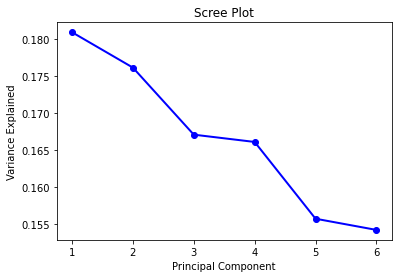

In [61]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [62]:
# We only need 3 PCs

#define PCA model to use
pca = PCA(n_components=5)

#fit PCA model to data
pca_fit = pca.fit_transform(x)

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pca_fit, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(364019, 5)
(40447, 5)
(364019,)


In [64]:
# Model here, just use logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000,solver='lbfgs')

lr.fit(x_train, y_train)
      
acc = lr.score(x_test, y_test)

print(f"Accuracy: {acc}")

Accuracy: 0.774766979009568
